In [69]:
import numpy as np
import pandas as pd
from astropy.table import Table
import collections
from matplotlib import gridspec
from astropy.io import fits
from astropy import wcs
import os
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sea
from grizli import model as griz_model

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [3]:
def Source_present(fn,ra,dec):  ### finds source in flt file, returns if present and the pos in pixels
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)
    present=False

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    [pos]=w.wcs_world2pix([[ra,dec]],1)

    if -100<pos[0]<xpixlim + 100 and -100<pos[1]<ypixlim + 100:
        present=True

    return present,pos

look for *all* the flt files witn 39170 in them

In [12]:
## test using s39170
RA = 53.041826 
DEC = -27.725868

filelist = glob(hpath + 'Clear_data/flt_files/*flt.fits')

flt_files = []
obj_pos =[]
for i in range(len(filelist)):
    pres,pos=Source_present(filelist[i],RA,DEC)
    if pres==True:
        obj_pos.append(pos)
        flt_files.append(filelist[i])

print(flt_files)

['/Users/vestrada/Clear_data/flt_files/icxt19o6q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt19o7q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt19o9q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt19oaq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt19ocq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt19odq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt20f7q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt20f8q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt20faq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt20fbq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt20fdq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt20feq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt21b7q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt21b8q_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt21baq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt21bcq_flt.fits', '/Users/vestrada/Clear_data/flt_files/icxt21beq_flt.fit

Seperate img files from spec files

In [21]:
imgflt=[]
specflt=[]

for i in range(len(flt_files)):
    indat=fits.open(flt_files[i])
    if indat[0].header['OBSTYPE'] ==  'IMAGING':
        imgflt.append(flt_files[i])
    if indat[0].header['OBSTYPE'] ==  'SPECTROSCOPIC':
        specflt.append(flt_files[i])

In [27]:
imgflt

['/Users/vestrada/Clear_data/flt_files/icxt19o9q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19odq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20faq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20feq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21baq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21bfq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22ppq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22ptq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23pyq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23q2q_flt.fits']

In [28]:
specflt

['/Users/vestrada/Clear_data/flt_files/icxt19o6q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19o7q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19oaq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt19ocq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20f7q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20f8q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20fbq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt20fdq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21b7q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21b8q_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21bcq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt21beq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22pmq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22pnq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22pqq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt22psq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/i

In [26]:
for i in range(len(flt_files)):
    indat=fits.open(flt_files[i])
    print(indat[0].header['OBSTYPE'],obj_pos[i])

SPECTROSCOPIC [-38.70660039 754.52490851]
SPECTROSCOPIC [-28.71435828 758.01555462]
IMAGING [-28.6447641  758.02073521]
SPECTROSCOPIC [-32.21176419 764.5419512 ]
SPECTROSCOPIC [-42.22170957 761.05989252]
IMAGING [-42.1892098  761.00556783]
SPECTROSCOPIC [-87.01460203 484.82830068]
SPECTROSCOPIC [-77.03019901 488.31423597]
IMAGING [-76.99219032 488.37041682]
SPECTROSCOPIC [-80.51919136 494.84669585]
SPECTROSCOPIC [-90.53705184 491.35973919]
IMAGING [-90.4725554  491.54600567]
SPECTROSCOPIC [-86.93048826 484.85416876]
SPECTROSCOPIC [-76.94583709 488.3401126 ]
IMAGING [-76.90766262 488.39628668]
SPECTROSCOPIC [-80.43509757 494.87256365]
SPECTROSCOPIC [-90.45267996 491.38561485]
IMAGING [-90.44107418 491.52817958]
SPECTROSCOPIC [ 58.89492179 901.87269883]
SPECTROSCOPIC [ 68.88454963 905.36881025]
IMAGING [ 68.96229513 905.34199648]
SPECTROSCOPIC [ 65.38860441 911.89097472]
SPECTROSCOPIC [ 55.37544831 908.41525547]
IMAGING [ 55.52069747 908.46460959]
SPECTROSCOPIC [ 58.87521163 901.95730619

# Files to exam first

Spectra -

['/Users/vestrada/Clear_data/flt_files/icxt23pzq_flt.fits',
 '/Users/vestrada/Clear_data/flt_files/icxt23q1q_flt.fits']
 
Imaging-

['/Users/vestrada/Clear_data/flt_files/icxt23q2q_flt.fits']

In [94]:
reference_image=hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits'
segment_map=hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits'

In [95]:
# initialize
flt = griz_model.GrismFLT(grism_file= hpath + 'Clear_data/flt_files/icxt23q1q_flt.fits', direct_file= hpath + 'Clear_data/flt_files/icxt23q2q_flt.fits',
                          ref_file=reference_image,seg_file=segment_map,
                            pad=200, ref_ext=0, shrink_segimage=False,force_grism='G102')

/Users/vestrada/Clear_data/flt_files/icxt23q2q_flt.fits / blot reference /Users/vestrada/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits[0]
Using default C-based coordinate transformation...
/Users/vestrada/Clear_data/flt_files/icxt23q2q_flt.fits / blot segmentation /Users/vestrada/Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F160W_seg.fits[0]
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


In [96]:
# catalog / semetation image
ref_cat=Table.read(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')

seg_cat=flt.blot_catalog(ref_cat,sextractor=False)

In [100]:
flt.compute_full_model(ids=seg_cat['id'], mags=-1)

In [101]:
def Mag(band):
    magnitude=25-2.5*np.log10(band)
    return magnitude

gal_id=39170
obj_mag = Mag(ref_cat['f_F125W'][np.argwhere(ref_cat['id']==gal_id)])

print('ID:%d, mag=%.2f' %(gal_id, obj_mag))

ID:39170, mag=20.32


(200, 1214)

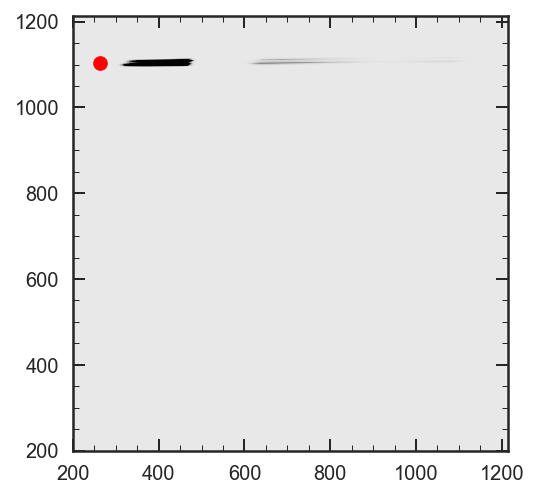

In [84]:
### Make sure these are initialized
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

### Compute model of a single object and catch the output, mag=-1 will force compute all orders
single_model = flt.compute_model_orders(id=id, compute_size=True, mag=-1, in_place=False)

## Show it
plt.imshow(single_model[1]*10, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')

plt.scatter(xseg, yseg, marker='o', color='r') # position in direct image

plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

In [85]:
## Only fit objects brighter than 26th mag (AB)
keep = flt.catalog['mag'] < 26

## Reset
flt.object_dispersers = collections.OrderedDict()
flt.model *= 0

## Helper function that loops over `self.compute_model_orders` for many objects
## Result is stored in the `self.model` attribute.
flt.compute_full_model(ids=flt.catalog['id'][keep], 
                       mags=flt.catalog['mag'][keep])

print('Compute full model (%d objects)' %(keep.sum()))

Compute full model (124 objects)


(200, 1214)

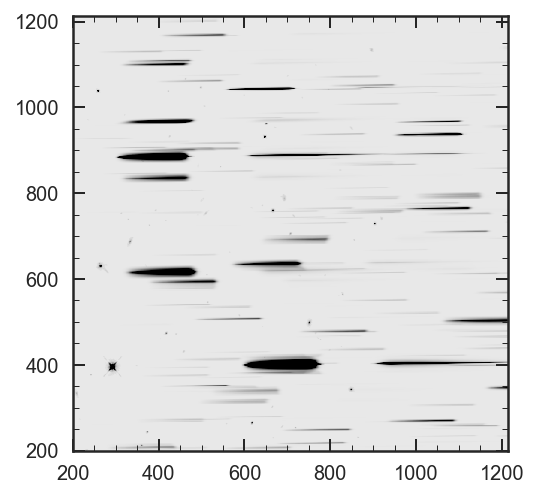

In [86]:
# Full model
plt.imshow(flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)

(200, 1214)

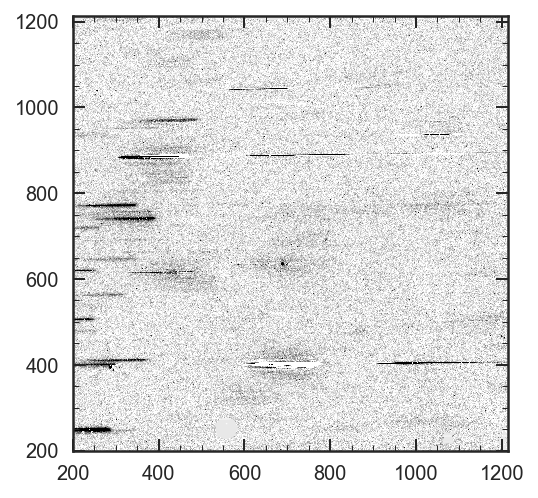

In [87]:
# residual# residu 
plt.imshow(flt.grism.data['SCI'] - flt.model, interpolation='Nearest', vmin=-0.02, vmax=0.2, 
           cmap='gray_r', origin='lower')
plt.xlim(flt.pad, flt.direct.sh[1]-flt.pad)
plt.ylim(flt.pad, flt.direct.sh[0]-flt.pad)
# Note, some spectra on the left side of the image aren't modeled because they fall off of 
# the direct image.  This can be accounted for when using reference mosaics that cover areas 
# larger than the FLT frames themselves.

# Also, this is just a crude model with simple (wrong) assumptions about the shapes of the object spectra!

Spectral orders:  (False, None, OrderedDict([('A', <grizli.model.GrismDisperser object at 0x1c3a55d518>), ('B', <grizli.model.GrismDisperser object at 0x1c3a55d550>), ('C', <grizli.model.GrismDisperser object at 0x1c3a55d588>), ('D', <grizli.model.GrismDisperser object at 0x1c3a55d5c0>), ('E', <grizli.model.GrismDisperser object at 0x1c3a55d5f8>)]))
(52, 112)
(52, 259)


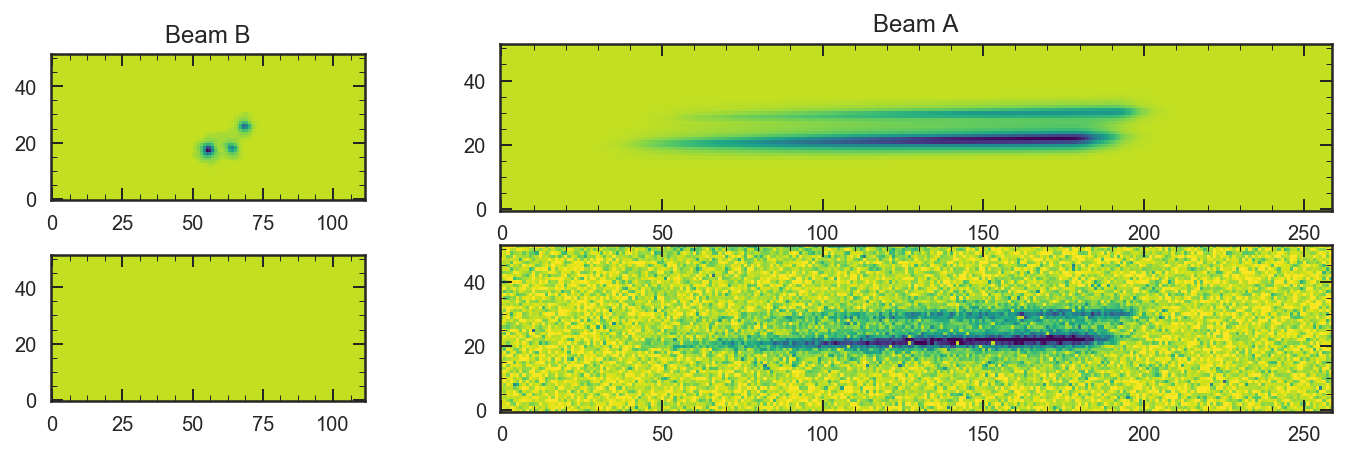

In [88]:
### Get the beams/orders
beams = flt.object_dispersers[id]
print('Spectral orders: ', beams)

### Make a figure showing the model (top) and observed (bottom) spectra
### for the first and zeroth orders.
fig = plt.figure(figsize=[10,3])
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,3.4],
                       height_ratios=[1,1])

for i, b in enumerate(['B','A']):
    beam = beams[2][b]
    print(beam.sh_beam)
    
    model = beam.compute_model(id=id, spectrum_1d=beam.spectrum_1d, in_place=False)
    vmax = model.max()
    
    #ax = fig.add_subplot(221+i)
    ax = fig.add_subplot(gs[0,i])
    ax.imshow(model.reshape(beam.sh_beam), interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)
    
    ax.set_title('Beam %s' %(b))
    
    ### Cutout of observed data
    sci_cutout = beam.cutout_from_full_image(flt.grism.data['SCI'])
    ax = fig.add_subplot(gs[1,i]) #fig.add_subplot(223+i)
    ax.imshow(sci_cutout, interpolation='Nearest', origin='lower', cmap='viridis_r', 
              vmin=-0.1*vmax, vmax=vmax)

fig.tight_layout(pad=0.1)

Available computed beams/orders for id=117: odict_keys(['A', 'B', 'C', 'D', 'E'])

`beam` class: <class 'grizli.model.GrismDisperser'>

`co` class: <class 'grizli.model.BeamCutout'>

Object 117, total flux density within the segmentation region: 6.600e-18 erg/s/cm2/A


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


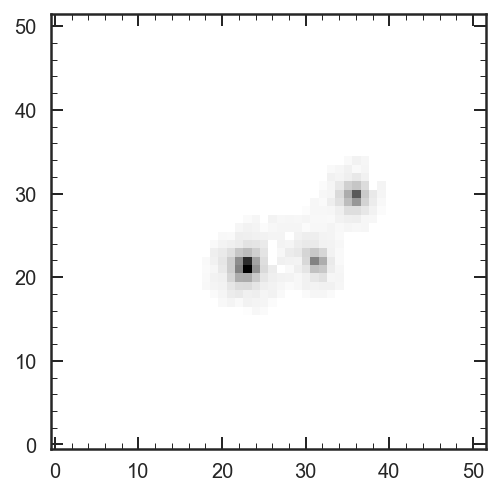

In [89]:
# reload(grizli.model)

print('Available computed beams/orders for id=%d: %s\n' %(id, flt.object_dispersers[id][2].keys()))
beam = flt.object_dispersers[id][2]['A'] # can choose other orders if available
beam.compute_model()
print('`beam` class: %s\n' %(beam.__class__))

### BeamCutout object
co = griz_model.BeamCutout(flt, beam, conf=flt.conf)
print('`co` class: %s\n' %(co.__class__))

print('Object %d, ' %(co.id) +
      'total flux density within the segmentation region: %.3e erg/s/cm2/A'%(co.beam.total_flux))
    
### Show the direct image
plt.imshow(co.beam.direct*(co.beam.seg == id), interpolation='Nearest', cmap='gray_r', origin='lower')